In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import altair as alt
import matplotlib

In [3]:
df = pd.read_csv('../data/train_data.zip')

In [3]:
df.columns

Index(['external_id', 'month', 'year', 'monthly_number_of_sessions',
       'monthly_unique_sessions', 'monthly_repeated_sessions',
       'monthly_avg_length_of_session', 'monthly_avg_light_activity',
       'monthly_avg_moderate_activity', 'monthly_avg_vigorous_activity',
       ...
       'avg_wind_9_10', 'avg_wind_10_11', 'avg_wind_11_12',
       'avg_wind_12_above', 'perfect_days', 'unacast_session_count', 'hpi',
       'state_and_local_amount_per_capita', 'state_amount_per_capita',
       'local_amount_per_capita'],
      dtype='object', length=861)

In [1]:
# Tried running overall PCA, requires dealing with nulls

# pca_all = PCA()
# pca_all.fit(df.drop(labels=['external_id','unacast_session_count'],axis=1).select_dtypes(include=[np.number]))

In [5]:
null_rate = (df.isna().sum(axis=0)/df.shape[0]).to_frame().rename(columns={0: "Null_rate"})

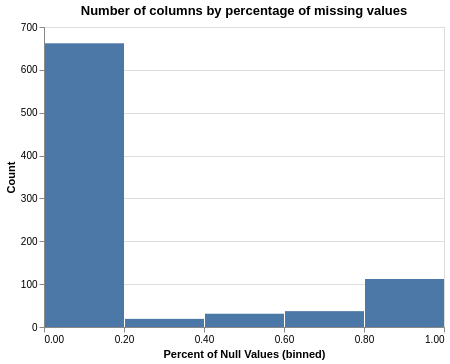

In [8]:
alt.Chart(null_rate).mark_bar().encode(
    alt.X("Null_rate:Q", bin=alt.Bin(maxbins=5),title="Percent of Null Values (binned)"),
    y=alt.Y('count()', title="Count")).properties(
    title='Number of columns by percentage of missing values'
)

In [45]:
(null_rate < 0.2).sum()

Null_rate    662
dtype: int64

In [46]:
(null_rate < 0.1).sum()

Null_rate    656
dtype: int64

In [51]:
((null_rate < 0.2)*(null_rate < 0.1)).sum()

/home/tani/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Null_rate    656
dtype: int64

In [6]:

vals = [0.2,0.4,0.6,0.8,1]

lst = [(null_rate < 0.2).sum()[0]]
for i in range(len(vals)-1):
    a = ((null_rate > vals[i])*(null_rate <= vals[i+1])).sum()
    lst.append(a[0])
    
print(lst, sum(lst))

[662, 19, 31, 37, 112] 861


/home/tani/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [8]:
grouped_df = df.groupby(by="external_id")

In [28]:
grouped_df.std().mean().sort_values(ascending=False).to_frame().rename(columns={0: "Standard_Deviation"}).dropna()#.query("Standard_Deviation > 0")

,Standard_Deviation
monthly_avg_length_of_session,156569.109949
monthly_avg_light_activity,53890.132010
monthly_avg_moderate_activity,35520.582851
total_mentions_across_state,23681.143066
monthly_avg_vigorous_activity,10091.983834
...,...
ice_cream,0.000000
hotel,0.000000
healthcare,0.000000
hairdresser_or_beauty,0.000000


Taking the internal playground standard deviation for each column and averaging across all playgrounds, only 173 values are not 0.

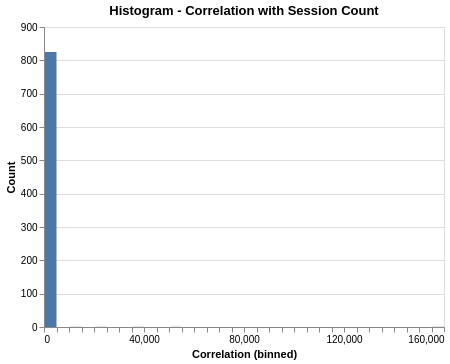

In [24]:
alt.Chart(grouped_df.std().mean().sort_values(ascending=False).to_frame().rename(columns={0: "Standard Deviation"}).dropna()).mark_bar().encode(
    alt.X("Standard Deviation:Q", bin=alt.Bin(maxbins=50),title="Correlation (binned)"),
    y=alt.Y('count()', title="Count")).properties(
    title='Histogram - Correlation with Session Count'
)

In [14]:
km=KMeans(n_clusters = i)